In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def fft_analysis(signal):
    slope, intercept = np.polyfit(np.arange(len(signal)), signal, 1)
    trend = np.arange(len(signal)) * slope + intercept
    detrended = signal - trend
    fft_values = np.fft.fft(detrended)
    frequencies = np.fft.fftfreq(len(fft_values))
    # Remove negative frequencies and sort
    positive_frequencies = frequencies[frequencies > 0]
    magnitudes = np.abs(fft_values)[frequencies > 0]
    # Identify dominant frequency
    dominant_frequency = positive_frequencies[np.argmax(magnitudes)]
    #print(f"Dominant Frequency: {dominant_frequency:.3f}")
    # Convert frequency to period (e.g., days, weeks, months, etc.)
    dominant_period = 1 / dominant_frequency
    #print(f"Dominant Period: {dominant_period:.2f} time units")
    return dominant_frequency

def process_file(file_path):
    data = pd.read_csv(file_path)

    data.columns = [
        "tachometer",
        "acc_under_axial",
        "acc_under_radiale",
        "acc_under_tangencial",
        "acc_over_axial",
        "acc_over_radiale",
        "acc_over_tangencial",
        "microphone",
    ]

    statistics_dict = {}

    for col in data.columns:
        statistics_dict[f'{col}_mean'] = data[col].mean()
        statistics_dict[f'{col}_median'] = data[col].median()
        statistics_dict[f'{col}_std'] = data[col].std()
        statistics_dict[f'{col}_variance'] = data[col].var()
        statistics_dict[f'{col}_range'] = data[col].max() - data[col].min()
        statistics_dict[f'{col}_skewness'] = data[col].skew()
        statistics_dict[f'{col}_kurtosis'] = data[col].kurt()
        statistics_dict[f'{col}_dominant_frequency'] = fft_analysis(data[col])

    label = os.path.normpath(file_path).split(os.sep)[2]
    statistics_dict['label'] = label

    return statistics_dict


def process_directory(root_dir):
    all_statistics = []

    for subdir, _, files in os.walk(root_dir):
        for file in files:
            if file.endswith(".csv"):
                file_path = os.path.join(subdir, file)
                print(f"Procesando archivo: {file_path}")
                try:
                    stats = process_file(file_path)
                    all_statistics.append(stats)
                except Exception as e:
                    print(f"Error procesando {file_path}: {e}")

    combined_df = pd.DataFrame(all_statistics)
    return combined_df


root_dir = '../bearing_fault_detection_reduced'
output_csv_path = 'combined_statistics_sobregrupos.csv'

combined_df = process_directory(root_dir)
combined_df.to_csv(output_csv_path, index=False)


print(f"Archivo grande combinado guardado en: {output_csv_path}")
print(f"Archivo pequeño combinado guardado en: {output_csv_path}")


Procesando archivo: ./bearing_fault_detection_reduced\bearing_fault_detection_reduced\horizontal-misalignment\0.5mm\12.288.csv
Procesando archivo: ./bearing_fault_detection_reduced\bearing_fault_detection_reduced\horizontal-misalignment\0.5mm\30.3104.csv
Procesando archivo: ./bearing_fault_detection_reduced\bearing_fault_detection_reduced\horizontal-misalignment\0.5mm\50.176.csv
Procesando archivo: ./bearing_fault_detection_reduced\bearing_fault_detection_reduced\horizontal-misalignment\0.5mm\62.0544.csv
Procesando archivo: ./bearing_fault_detection_reduced\bearing_fault_detection_reduced\horizontal-misalignment\1.0mm\12.288.csv
Procesando archivo: ./bearing_fault_detection_reduced\bearing_fault_detection_reduced\horizontal-misalignment\1.0mm\30.5152.csv
Procesando archivo: ./bearing_fault_detection_reduced\bearing_fault_detection_reduced\horizontal-misalignment\1.0mm\50.176.csv
Procesando archivo: ./bearing_fault_detection_reduced\bearing_fault_detection_reduced\horizontal-misalignmen

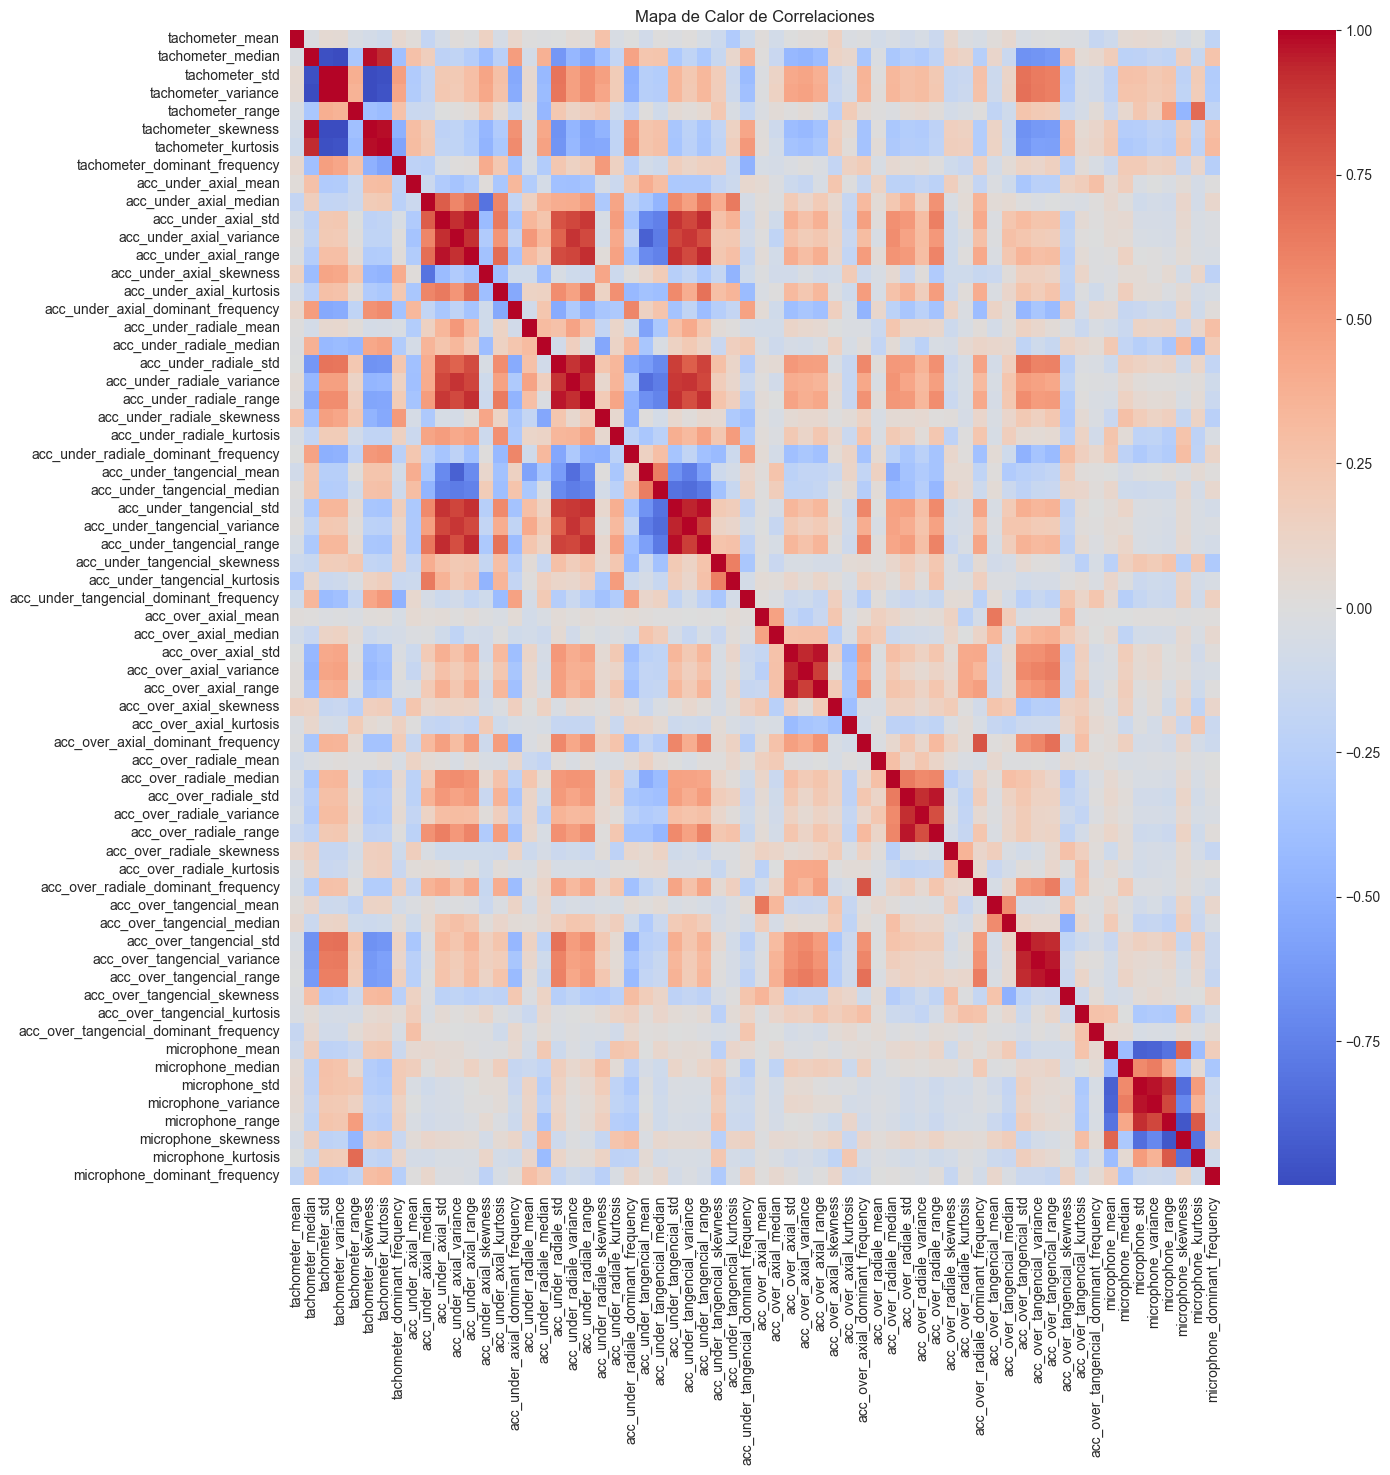


Highly correlated feature pairs (|correlation| > 0.9):
tachometer_median & tachometer_std: -0.981
tachometer_median & tachometer_variance: -0.992
tachometer_median & tachometer_skewness: 0.978
tachometer_median & tachometer_kurtosis: 0.927
tachometer_std & tachometer_variance: 0.997
tachometer_std & tachometer_skewness: -0.999
tachometer_std & tachometer_kurtosis: -0.980
tachometer_variance & tachometer_skewness: -0.995
tachometer_variance & tachometer_kurtosis: -0.964
tachometer_skewness & tachometer_kurtosis: 0.984
acc_under_axial_std & acc_under_axial_variance: 0.918
acc_under_axial_std & acc_under_axial_range: 0.977
acc_under_axial_std & acc_under_tangencial_std: 0.901
acc_under_axial_std & acc_under_tangencial_range: 0.922
acc_under_axial_variance & acc_under_axial_range: 0.907
acc_under_axial_variance & acc_under_radiale_variance: 0.904
acc_under_axial_variance & acc_under_tangencial_mean: -0.901
acc_under_axial_range & acc_under_radiale_range: 0.918
acc_under_axial_range & acc_

In [5]:
import seaborn as sns

ruta_csv = 'combined_statistics_sobregrupos.csv'
df = pd.read_csv(ruta_csv)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

correlaciones = X.corr()

plt.figure(figsize=(15, 15))

sns.heatmap(correlaciones, annot=False, cmap='coolwarm', cbar=True)

plt.title('Mapa de Calor de Correlaciones')
plt.show()

print("\nHighly correlated feature pairs (|correlation| > 0.9):")
high_corr = np.where(np.abs(correlaciones) > 0.9)


for i, j in zip(*high_corr):
    if i < j:
        print(f"{correlaciones.index[i]} & {correlaciones.columns[j]}: {correlaciones.iloc[i, j]:.3f}")

Correlaciones más fuertes:
4032
tachometer_skewness      tachometer_std             0.999238
tachometer_std           tachometer_skewness        0.999238
tachometer_variance      tachometer_std             0.997455
tachometer_std           tachometer_variance        0.997455
tachometer_skewness      tachometer_variance        0.995284
                                                      ...   
acc_over_axial_mean      microphone_median          0.000258
acc_under_radiale_mean   acc_over_axial_skewness    0.000114
acc_over_axial_skewness  acc_under_radiale_mean     0.000114
acc_over_axial_std       tachometer_mean            0.000007
tachometer_mean          acc_over_axial_std         0.000007
Length: 4032, dtype: float64


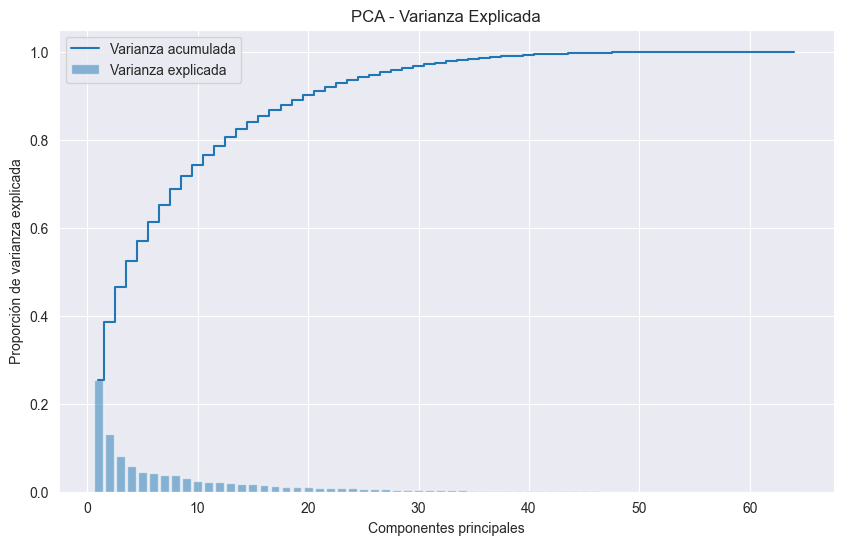

Varianza explicada por componente:
Componente 1: 0.2533
Componente 2: 0.1313
Componente 3: 0.0803
Componente 4: 0.0592
Componente 5: 0.0450
Componente 6: 0.0429
Componente 7: 0.0386
Componente 8: 0.0371
Componente 9: 0.0304
Componente 10: 0.0234
Componente 11: 0.0227
Componente 12: 0.0216
Componente 13: 0.0202
Componente 14: 0.0176
Componente 15: 0.0167
Componente 16: 0.0143
Componente 17: 0.0132
Componente 18: 0.0117
Componente 19: 0.0113
Componente 20: 0.0107
Componente 21: 0.0095
Componente 22: 0.0091
Componente 23: 0.0085
Componente 24: 0.0074
Componente 25: 0.0064
Componente 26: 0.0057
Componente 27: 0.0054
Componente 28: 0.0050
Componente 29: 0.0046
Componente 30: 0.0043
Componente 31: 0.0040
Componente 32: 0.0035
Componente 33: 0.0032
Componente 34: 0.0028
Componente 35: 0.0025
Componente 36: 0.0024
Componente 37: 0.0021
Componente 38: 0.0018
Componente 39: 0.0017
Componente 40: 0.0014
Componente 41: 0.0011
Componente 42: 0.0010
Componente 43: 0.0009
Componente 44: 0.0007
Compon

In [6]:

correlaciones_desordenadas = correlaciones.unstack()
correlaciones_ordenadas = correlaciones_desordenadas.abs().sort_values(ascending=False)

correlaciones_filtradas = correlaciones_ordenadas[
    correlaciones_ordenadas.index.get_level_values(0) != correlaciones_ordenadas.index.get_level_values(1)]

print("Correlaciones más fuertes:")
print(len(correlaciones_filtradas))
print(correlaciones_filtradas.head(4032))  #aqui ponemos las correlaciones que queremos
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

ruta_csv = 'combined_statistics.csv'
df = pd.read_csv(ruta_csv)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(varianza_explicada) + 1), varianza_explicada, alpha=0.5, align='center',
        label='Varianza explicada')
plt.step(range(1, len(varianza_acumulada) + 1), varianza_acumulada, where='mid', label='Varianza acumulada')
plt.xlabel('Componentes principales')
plt.ylabel('Proporción de varianza explicada')
plt.title('PCA - Varianza Explicada')
plt.legend(loc='best')
plt.show()

print("Varianza explicada por componente:")
for i, var in enumerate(varianza_explicada, start=1):
    print(f"Componente {i}: {var:.4f}")

n_componentes_optimos = np.argmax(varianza_acumulada >= 0.9) + 1
print(f"\nNúmero óptimo de componentes para capturar el 90% de la varianza: {n_componentes_optimos}")

pca_optimo = PCA(n_components=n_componentes_optimos)
X_reducido = pca_optimo.fit_transform(X_scaled)

print(f"Conjunto de datos reducido a {n_componentes_optimos} componentes principales.")
correlation_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr()

In [7]:
loadings = pca.components_

loadings_df = pd.DataFrame(loadings, columns=X.columns)
loadings_df.head(20)
filtered_loadings = loadings_df.applymap(lambda x: x if abs(x) > 0.2 else None)

for i in range(20):
    print(f"Componente Principal {i + 1}:")
    print(filtered_loadings.loc[i].dropna())
    print("\n")
variables_importantes = []

for i in range(20):
    print(f"Componente Principal {i + 1}:")
    high_contrib = loadings_df.loc[i].abs().sort_values(ascending=False).head(4)
    print(high_contrib)
    print("\n")

    for variable in high_contrib.index:
        if variable not in variables_importantes:
            variables_importantes.append(variable)

print("Variables con alta contribución en las primeras 19 componentes principales:")
print(variables_importantes)
print(len(variables_importantes))

Componente Principal 1:
acc_under_axial_range         0.206812
acc_under_radiale_std         0.238527
acc_under_radiale_variance    0.213323
acc_under_radiale_range       0.233239
acc_under_tangencial_std      0.209431
acc_under_tangencial_range    0.209155
Name: 0, dtype: float64


Componente Principal 2:
tachometer_std             -0.200056
tachometer_skewness         0.200854
tachometer_kurtosis         0.208958
acc_under_axial_median      0.221725
acc_under_axial_skewness   -0.207610
acc_under_radiale_median    0.221161
microphone_std             -0.204245
microphone_range           -0.215056
microphone_skewness         0.205491
Name: 1, dtype: float64


Componente Principal 3:
acc_over_tangencial_range   -0.206711
microphone_mean             -0.255019
microphone_std               0.282128
microphone_variance          0.262815
microphone_range             0.294321
microphone_skewness         -0.283818
microphone_kurtosis          0.213009
Name: 2, dtype: float64


Componente Princi

C:\Users\hodei\AppData\Local\Temp\ipykernel_17828\1286720932.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_loadings = loadings_df.applymap(lambda x: x if abs(x) > 0.2 else None)


In [8]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import GridSearchCV, train_test_split


# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#stratify --> y bakoitza 80%-tan banatzeko


rf_param_grid = {
    'n_estimators': range(50, 200, 10),
    'max_depth': range(1,30,2),
    'min_samples_split': range(2,60,2),
    'min_samples_leaf': range(1,60,2),
}

# GridSearchCV para encontrar los mejores hiperparámetros
print("Optimizing Random Forest...")
rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)
rf_grid_search.fit(X_train, y_train)
print(f"Best Random Forest Params: {rf_grid_search.best_params_}")

In [ ]:

import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


def objective(trial):
    n_estimators = trial.randint('n_estimators', 50, 200)
    max_depth = trial.randint('max_depth', 1, 30)
    min_samples_split = trial.randint('min_samples_split', 2, 60)
    min_samples_leaf = trial.randint('min_samples_leaf', 1, 60)

    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    score = cross_val_score(rf, X_train, y_train, n_jobs=-1, cv=5, scoring='accuracy')

    return score.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Best Random Forest Params:", study.best_params)

In [11]:
best_rf = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=50,
                                 random_state=42)
best_rf.fit(X_train, y_train)

rf_train_pred = best_rf.predict(X_train)
rf_test_pred = best_rf.predict(X_test)

print("\nClassification Report (Training):")
print(classification_report(y_train, rf_train_pred))

print("\nClassification Report (Testing):")
print(classification_report(y_test, rf_test_pred))



Classification Report (Training):
                         precision    recall  f1-score   support

horizontal-misalignment       0.93      1.00      0.96        13
              imbalance       1.00      1.00      1.00        23
                 normal       1.00      0.33      0.50         3
               overhang       1.00      1.00      1.00        38
              underhang       1.00      1.00      1.00        38
  vertical-misalignment       0.95      1.00      0.97        19

               accuracy                           0.99       134
              macro avg       0.98      0.89      0.91       134
           weighted avg       0.99      0.99      0.98       134


Classification Report (Testing):
                         precision    recall  f1-score   support

horizontal-misalignment       0.75      1.00      0.86         3
              imbalance       1.00      0.80      0.89         5
                 normal       0.00      0.00      0.00         1
               ov

C:\Users\hodei\.conda\envs\PythonProject\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hodei\.conda\envs\PythonProject\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hodei\.conda\envs\PythonProject\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r


Feature Importance Analysis:


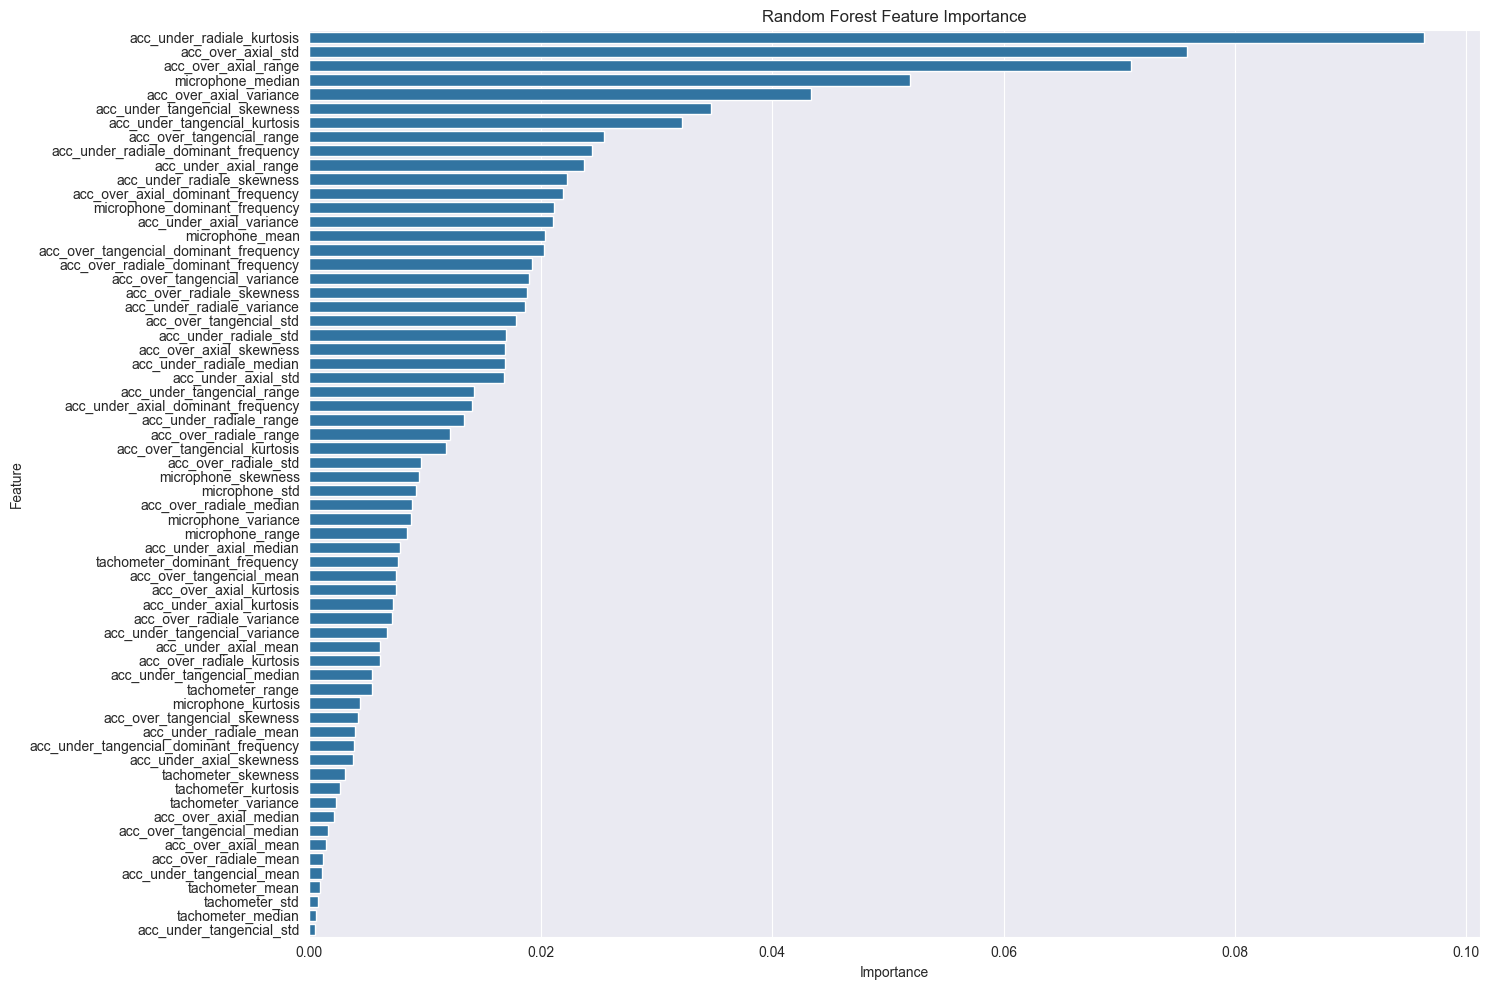


Feature Importance Ranking:
                       feature  importance
22  acc_under_radiale_kurtosis    0.096350
34          acc_over_axial_std    0.075817
36        acc_over_axial_range    0.070998
57           microphone_median    0.051924
35     acc_over_axial_variance    0.043330
..                         ...         ...
24   acc_under_tangencial_mean    0.001103
0              tachometer_mean    0.000886
2               tachometer_std    0.000754
1            tachometer_median    0.000593
26    acc_under_tangencial_std    0.000493

[64 rows x 2 columns]


In [12]:

def plot_feature_importance(model, feature_names, title="Feature Importance"):

    importances = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(15, 10))
    sns.barplot(data=importances, x='importance', y='feature')
    plt.title(title)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

    return importances


print("\nFeature Importance Analysis:")
importance_df = plot_feature_importance(best_rf, X.columns,
                                        "Random Forest Feature Importance")
print("\nFeature Importance Ranking:")
print(importance_df)

In [13]:
total_importance = importance_df['importance'].sum()
# print(total_importance) --> efektibamente da 1

cumulative_importance = importance_df['importance'].cumsum()
selected_features = importance_df[cumulative_importance <= total_importance * 0.9]

print("\nSelected Features (90% of importance):")
print(selected_features)
X = X[selected_features['feature']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_rf.fit(X_train, y_train)

rf_train_pred = best_rf.predict(X_train)
rf_test_pred = best_rf.predict(X_test)

print("\nClassification Report (Training):")
print(classification_report(y_train, rf_train_pred))

print("\nClassification Report (Testing):")
print(classification_report(y_test, rf_test_pred))


Selected Features (90% of importance):
                                   feature  importance
22              acc_under_radiale_kurtosis    0.096350
34                      acc_over_axial_std    0.075817
36                    acc_over_axial_range    0.070998
57                       microphone_median    0.051924
35                 acc_over_axial_variance    0.043330
29           acc_under_tangencial_skewness    0.034738
30           acc_under_tangencial_kurtosis    0.032201
52               acc_over_tangencial_range    0.025463
23    acc_under_radiale_dominant_frequency    0.024409
12                   acc_under_axial_range    0.023715
21              acc_under_radiale_skewness    0.022304
39       acc_over_axial_dominant_frequency    0.021930
63           microphone_dominant_frequency    0.021126
11                acc_under_axial_variance    0.021065
56                         microphone_mean    0.020383
55  acc_over_tangencial_dominant_frequency    0.020266
47     acc_over_radiale_d

C:\Users\hodei\.conda\envs\PythonProject\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hodei\.conda\envs\PythonProject\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hodei\.conda\envs\PythonProject\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

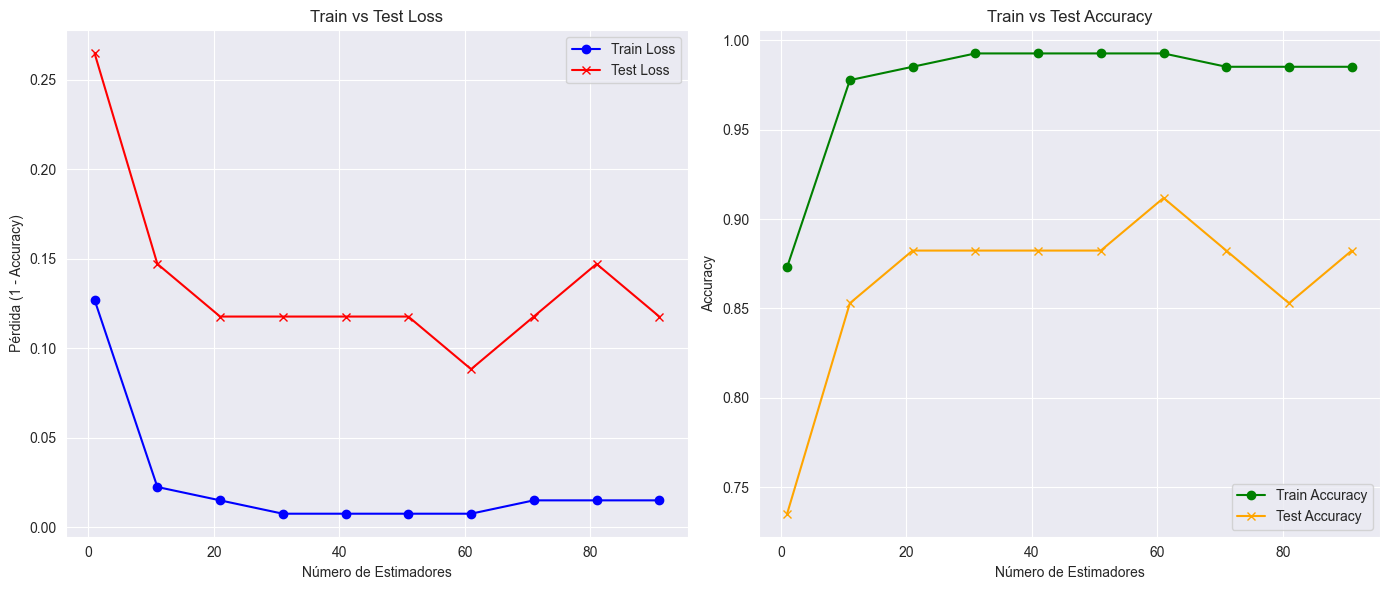

In [14]:
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

for n_estimators in range(1, 101, 10):
    best_rf.set_params(n_estimators=n_estimators)
    best_rf.fit(X_train, y_train)

    # Predicciones
    train_pred = best_rf.predict(X_train)
    test_pred = best_rf.predict(X_test)

    # Calcular Loss (1 - accuracy)
    train_loss.append(1 - accuracy_score(y_train, train_pred))
    test_loss.append(1 - accuracy_score(y_test, test_pred))

    # Calcular accuracy
    train_accuracy.append(accuracy_score(y_train, train_pred))
    test_accuracy.append(accuracy_score(y_test, test_pred))

fig, ax1 = plt.subplots(1, 2, figsize=(14, 6))

ax1[0].plot(range(1, 101, 10), train_loss, label='Train Loss', color='blue', marker='o')
ax1[0].plot(range(1, 101, 10), test_loss, label='Test Loss', color='red', marker='x')
ax1[0].set_xlabel('Número de Estimadores')
ax1[0].set_ylabel('Pérdida (1 - Accuracy)')
ax1[0].set_title('Train vs Test Loss')
ax1[0].legend()

ax1[1].plot(range(1, 101, 10), train_accuracy, label='Train Accuracy', color='green', marker='o')
ax1[1].plot(range(1, 101, 10), test_accuracy, label='Test Accuracy', color='orange', marker='x')
ax1[1].set_xlabel('Número de Estimadores')
ax1[1].set_ylabel('Accuracy')
ax1[1].set_title('Train vs Test Accuracy')
ax1[1].legend()

plt.tight_layout()
plt.show()


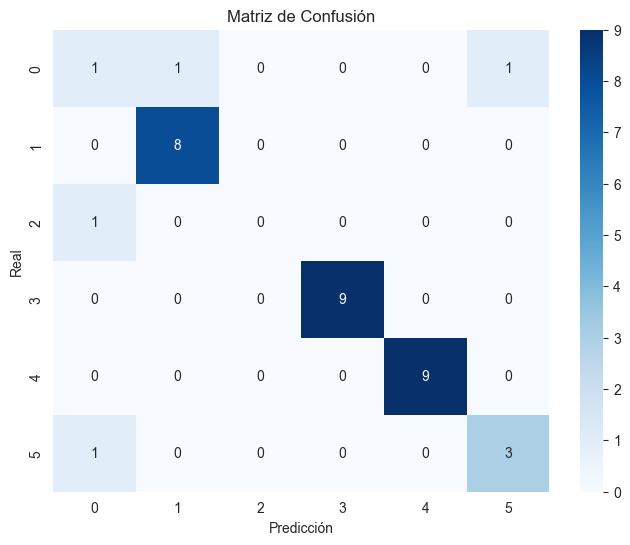

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

rf_test_pred = best_rf.predict(X_test)

conf_matrix = confusion_matrix(y_test, rf_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


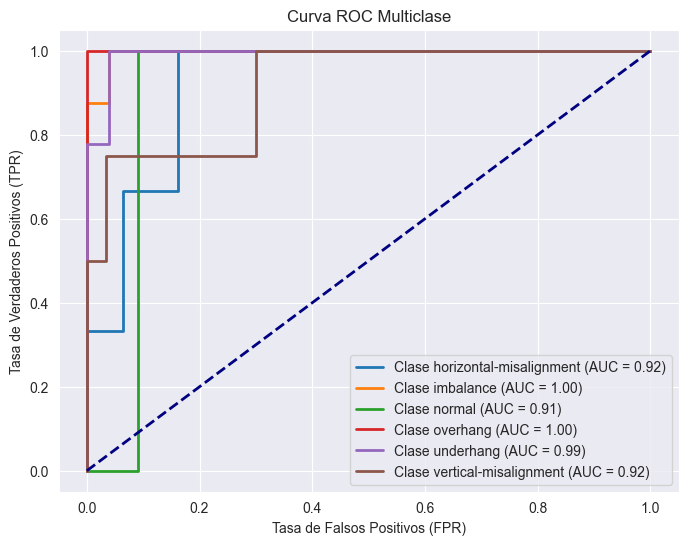

In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

classes = sorted(set(y_test))
y_test_binarized = label_binarize(y_test, classes=classes)
rf_test_prob = best_rf.predict_proba(X_test)

plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], rf_test_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Clase {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC Multiclase')
plt.legend(loc='lower right')
plt.show()
